<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [0]:
dataset=pd.read_csv('bal.csv')

In [0]:
dataset['month']=pd.to_datetime(dataset['month'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['month'])

In [5]:
from datetime import datetime
indexedDataset.head(5)

,rate
month,
2017-04-21,8
2017-02-11,21
2017-04-25,18
2017-04-07,20
2017-04-08,42


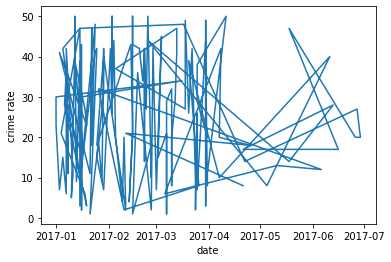

In [6]:
plt.xlabel("date")
plt.ylabel("crime rate")
plt.plot(indexedDataset)

In [7]:
rolmean=indexedDataset.rolling(window=12).mean()
rolstd=indexedDataset.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))


                 rate
month                
2017-04-21        NaN
2017-02-11        NaN
2017-04-25        NaN
2017-04-07        NaN
2017-04-08        NaN
2017-03-06        NaN
2017-05-11        NaN
2017-06-06        NaN
2017-01-26        NaN
2017-02-10        NaN
2017-03-26        NaN
2017-03-20  18.416667
2017-04-07  18.583333
2017-06-11  20.166667
2017-05-05  19.333333
                 rate
month                
2017-04-21        NaN
2017-02-11        NaN
2017-04-25        NaN
2017-04-07        NaN
2017-04-08        NaN
2017-03-06        NaN
2017-05-11        NaN
2017-06-06        NaN
2017-01-26        NaN
2017-02-10        NaN
2017-03-26        NaN
2017-03-20  13.090304
2017-04-07  12.957682
2017-06-11  14.364308
2017-05-05  14.785333


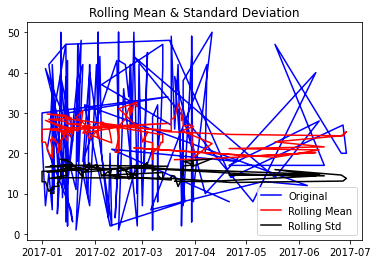

In [8]:
original=plt.plot(indexedDataset, color='blue', label='Original')
mean=plt.plot(rolmean, color='red', label='Rolling Mean') 
std=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(indexedDataset['rate'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Dickey-Fuller Test: 
Test Statistic         -1.356221e+01
p-value                 2.298467e-25
Lags Used               0.000000e+00
No. of Obs              1.420000e+02
Critical Value (1%)    -3.477262e+00
Critical Value (5%)    -2.882118e+00
Critical Value (10%)   -2.577743e+00
dtype: float64


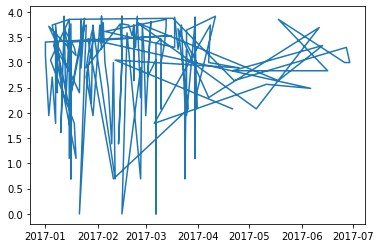

In [11]:
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


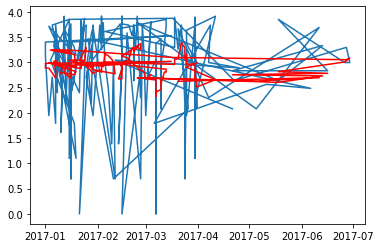

In [13]:
MAvg=indexedDataset_logScale.rolling(window=12).mean()
MStd=indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(MAvg, color='red')


In [14]:
datasetLogScaleMinusMovingAverage=indexedDataset_logScale-MAvg
datasetLogScaleMinusMovingAverage.head(12)

,rate
month,
2017-04-21,NaN
2017-02-11,NaN
2017-04-25,NaN
2017-04-07,NaN
2017-04-08,NaN
2017-03-06,NaN
2017-05-11,NaN
2017-06-06,NaN
2017-01-26,NaN


In [15]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,rate
month,
2017-03-20,1.039292
2017-04-07,-0.340280
2017-06-11,0.992318
2017-05-05,-0.549543
2017-02-24,1.089501
2017-05-18,0.035919
2017-06-13,0.600696
2017-04-21,0.079350
2017-06-16,0.050324


In [0]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    orig=plt.plot(timeseries, color='blue', label='Original')
    mean=plt.plot(rolmean, color='red', label='Rolling Mean') 
    std=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['rate'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


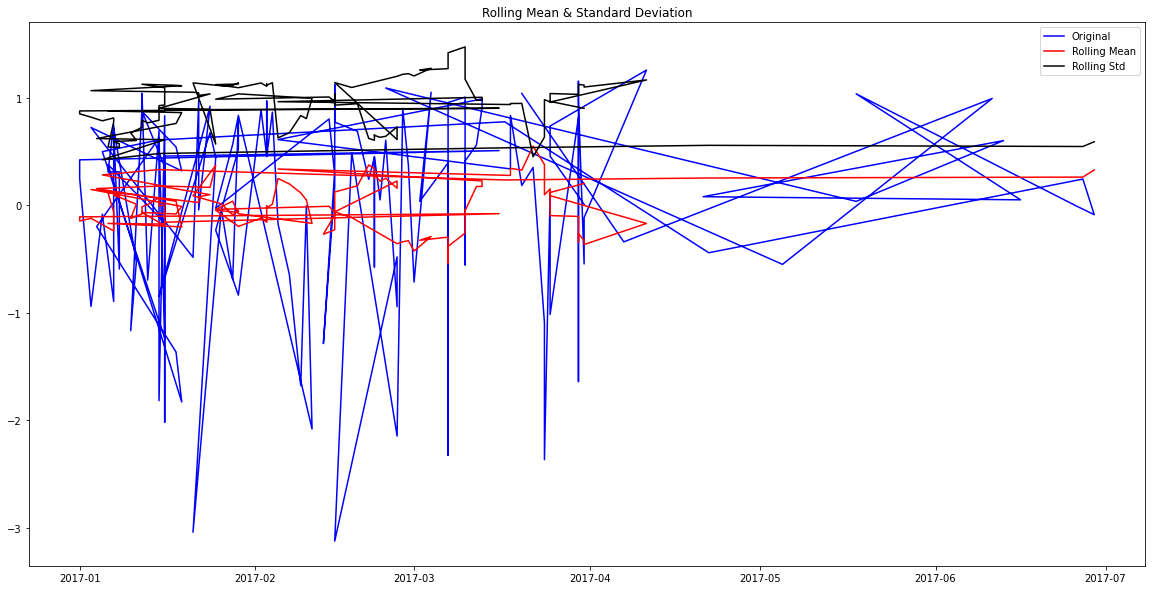

Dickey-Fuller Test: 
Test Statistic         -6.977636e+00
p-value                 8.348945e-10
Lags Used               1.000000e+00
No. of Obs              1.300000e+02
Critical Value (1%)    -3.481682e+00
Critical Value (5%)    -2.884042e+00
Critical Value (10%)   -2.578770e+00
dtype: float64


In [18]:
stationarity(datasetLogScaleMinusMovingAverage)

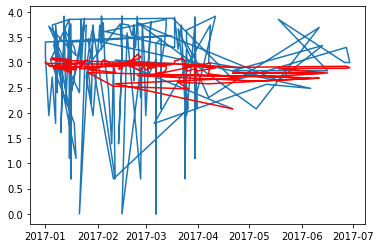

In [19]:
exp_data=indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exp_data, color='red')


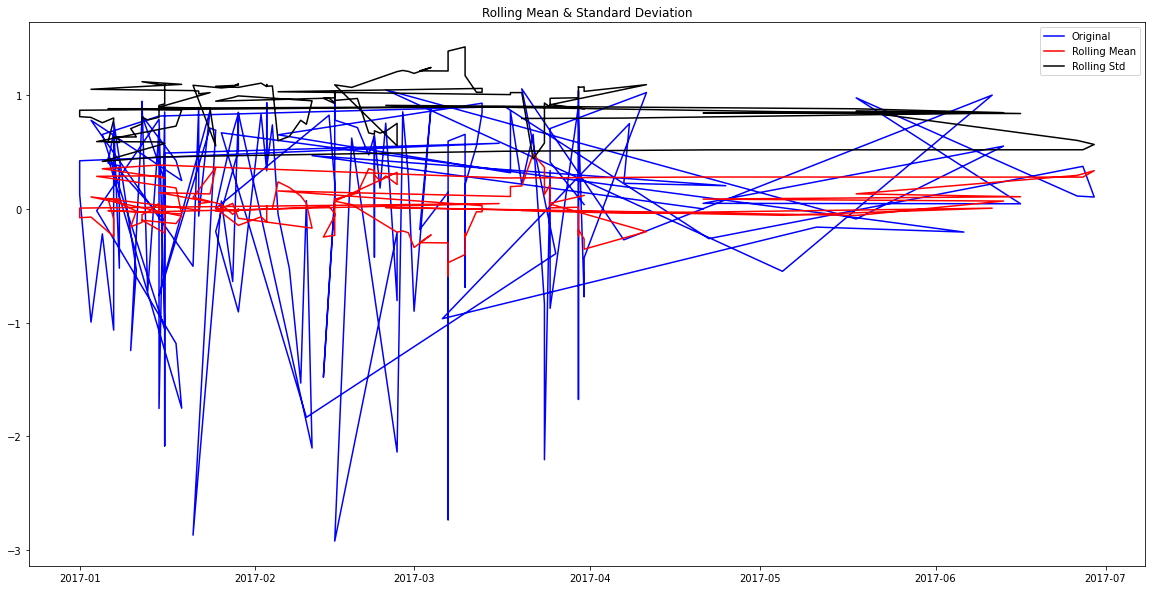

Dickey-Fuller Test: 
Test Statistic         -1.359883e+01
p-value                 1.971093e-25
Lags Used               0.000000e+00
No. of Obs              1.420000e+02
Critical Value (1%)    -3.477262e+00
Critical Value (5%)    -2.882118e+00
Critical Value (10%)   -2.577743e+00
dtype: float64


In [20]:
exp_data_diff=indexedDataset_logScale-exp_data
stationarity(exp_data_diff)

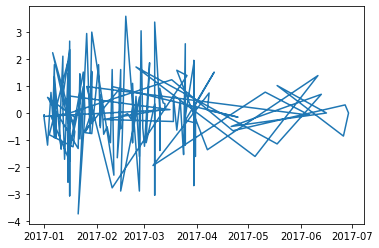

In [21]:
data_shift=indexedDataset_logScale-indexedDataset_logScale.shift()
plt.plot(data_shift)

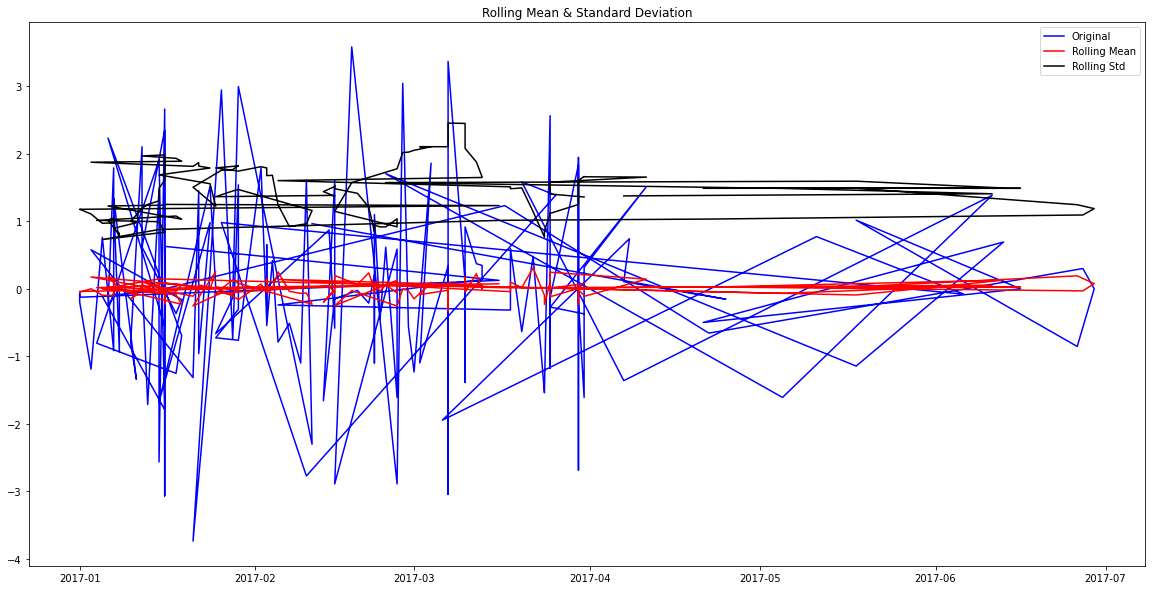

Dickey-Fuller Test: 
Test Statistic         -6.322895e+00
p-value                 3.035449e-08
Lags Used               1.200000e+01
No. of Obs              1.290000e+02
Critical Value (1%)    -3.482088e+00
Critical Value (5%)    -2.884219e+00
Critical Value (10%)   -2.578864e+00
dtype: float64


In [22]:
data_shift.dropna(inplace=True)
stationarity(data_shift)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(indexedDataset_logScale)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
stationarity(decomposedLogData)

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

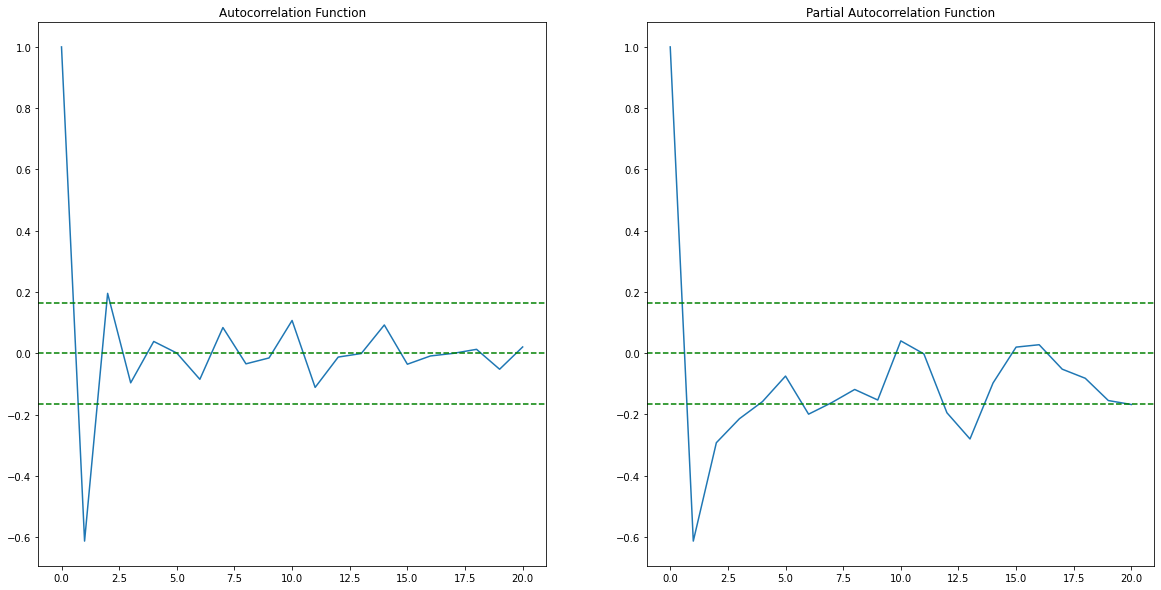

In [26]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overf

plotting ARIMA model


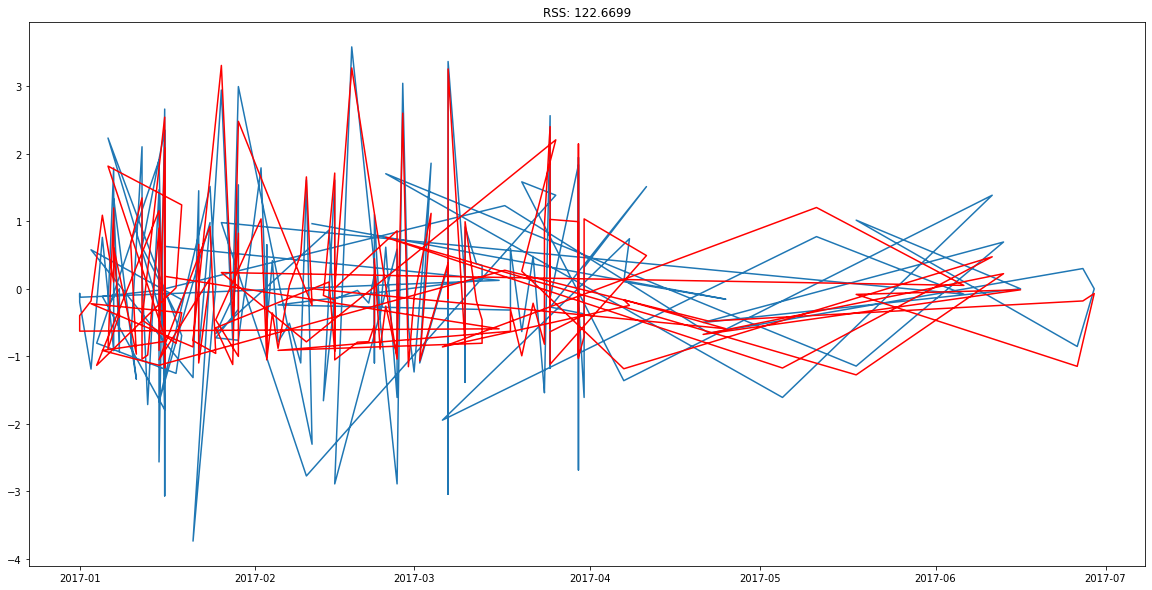

In [28]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(20,10))
model=ARIMA(indexedDataset_logScale, order=(2,1,2))
results=model.fit(disp=-1)
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results.fittedvalues-data_shift['rate'])**2))
print('plotting ARIMA model')


In [35]:
predictions=pd.Series(results.fittedvalues, copy=True)
print(predictions.head())

month
2017-02-11    0.000590
2017-04-25   -0.591541
2017-04-07   -0.163139
2017-04-08   -0.246426
2017-03-06   -0.860965
dtype: float64


In [36]:
predictions_cum_sum=predictions.cumsum()
print(predictions_cum_sum.head())


month
2017-02-11    0.000590
2017-04-25   -0.590951
2017-04-07   -0.754090
2017-04-08   -1.000516
2017-03-06   -1.861482
dtype: float64


In [32]:
import pandas
print(pandas.__version__)


1.0.3


In [33]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [41]:
predictions_log=pd.Series(indexedDataset_logScale['rate'], index=indexedDataset_logScale.index)
predictions_log=predictions_log.add(predictions_cum_sum,fill_value=0)
predictions_log.head()


month
2017-01-01   -1.303893
2017-01-01   -1.773164
2017-01-01   -2.170610
2017-01-01   -1.372885
2017-01-01   -1.842157
dtype: float64

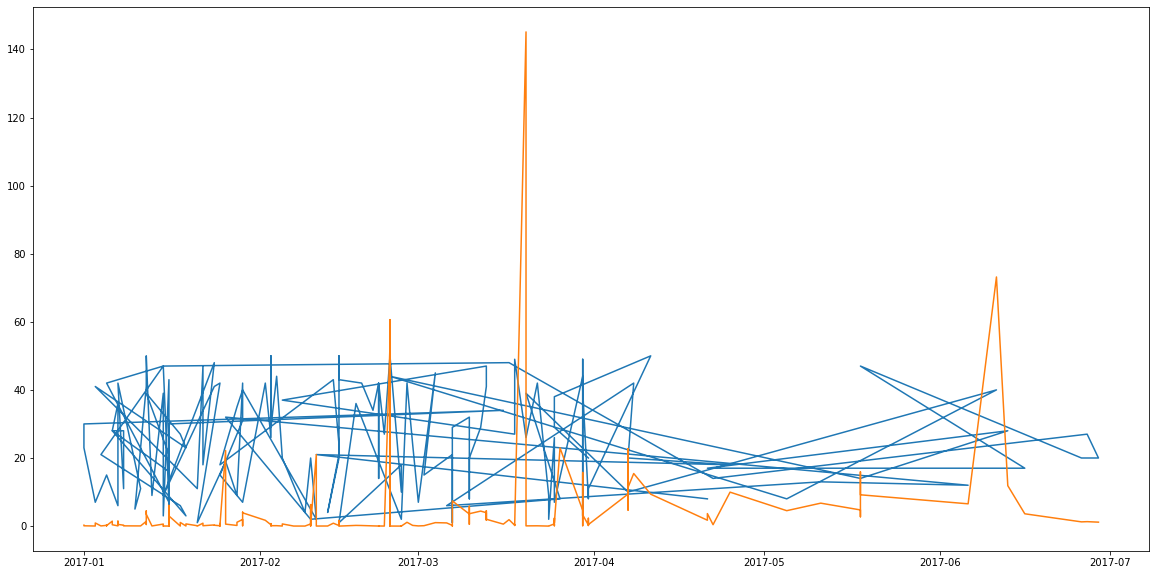

In [42]:
predictions_ARIMA=np.exp(predictions_log)
plt.figure(figsize=(20,10))
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [43]:
indexedDataset_logScale

,rate
month,
2017-04-21,2.079442
2017-02-11,3.044522
2017-04-25,2.890372
2017-04-07,2.995732
2017-04-08,3.737670
...,...
2017-03-31,2.397895
2017-04-11,3.912023
2017-03-25,3.637586


In [0]:
#rcParams['figure.figsize']=20,10
#results.plot_predict(1,264)
x=results.forecast(steps=120)


In [47]:
x[1]

array([0.91653193, 0.92176193, 0.92933939, 0.93002945, 0.93025029,
       0.93028602, 0.93029421, 0.93029577, 0.9302961 , 0.93029616,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029618,
       0.93029618, 0.93029618, 0.93029618, 0.93029618, 0.93029

In [48]:
len(x[1])

120

In [49]:
np.exp(x[1])

array([2.50060308, 2.51371549, 2.53283541, 2.53458383, 2.53514362,
       2.53523421, 2.53525497, 2.53525892, 2.53525975, 2.53525992,
       2.53525995, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525996,
       2.53525996, 2.53525996, 2.53525996, 2.53525996, 2.53525